In [ ]:
from nba_api.stats.endpoints import shotchartdetail
from nba_api.stats.static import players, teams
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc

print("Imported libraries")

Imported libraries


In [ ]:
# pick a player
player_name = "Stephen Curry"
player = players.find_players_by_full_name(player_name)[0]
player_id = player['id']

# shot chart
# just gonna use team ID 0 for ease (all teams)
shots = shotchartdetail.ShotChartDetail(
    team_id = 0,
    player_id = player_id,
    season_nullable = '2024-25',
    context_measure_simple = 'FGA'
)

shots_df = shots.get_data_frames()[0]
print(f"Total shots: {len(shots_df)}")
print("\nFirst few shots:")
print(shots_df[['LOC_X', 'LOC_Y', 'SHOT_MADE_FLAG', 'SHOT_DISTANCE']].head())


Total shots: 1258

First few shots:
   LOC_X  LOC_Y  SHOT_MADE_FLAG  SHOT_DISTANCE
0   -199    157               1             25
1    -34     15               1              3
2    179    237               0             29
3   -175    264               1             31
4    137     36               0             14


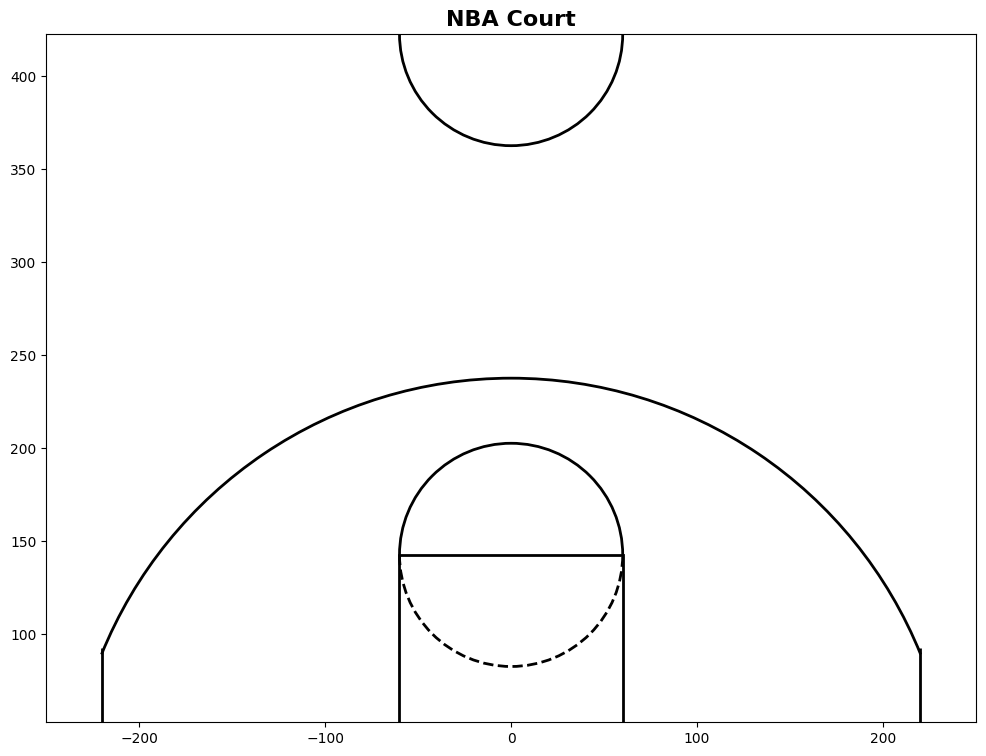

In [ ]:
# drawing court
def draw_court(ax = None, color = 'black', lw = 2):
    if ax is None:
        ax = plt.gca()  

    # hoop
    hoop = Circle((0,0), radius = 7.5, linewidth = lw, color = color, fill = False)

    # backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth = lw, color = color)

    # paint
    outer_box = Rectangle((-80, -47.5), 60, -1, linewidth = lw, color = color, fill = False)
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth = lw, color = color, fill = False)

    # free throw arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1 = 0, theta2 = 180, linewidth = lw, color = color,
                        fill = False)
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1 = 180, theta2 = 0, linewidth = lw,
                            color = color, linestyle = 'dashed', fill = False)

    # 3 point line
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth = lw, color = color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth = lw, color = color)
    three_arc = Arc((0,0), 475, 475, theta1 = 22, theta2 = 158, linewidth = lw, color = color)

    # center court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1 = 180, theta2 = 0, linewidth = lw, color = color)

    # add all elements
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw, bottom_free_throw,
                  corner_three_a, corner_three_b, three_arc, center_outer_arc]

    for element in court_elements:
        ax.add_patch(element)

    return ax

# court test
fig, ax = plt.subplots(figsize = (12, 11))
draw_court(ax)
ax.set_xlim(-250, 250)
ax.set_ylim(52.5, 422.5)
ax.set_aspect('equal')
plt.title('NBA Court', fontsize = 16, fontweight = 'bold')
plt.show()


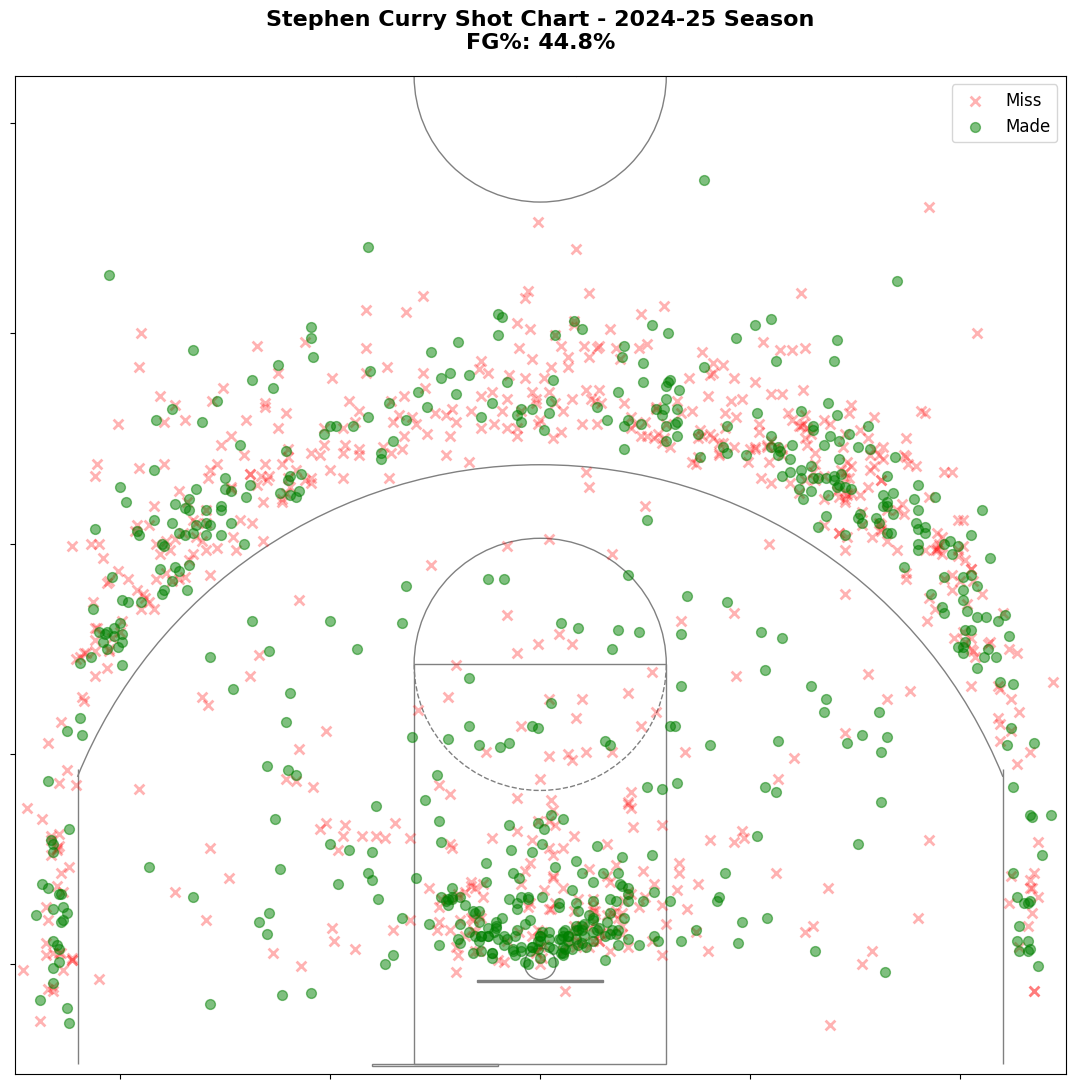


Shooting Stats:
Total Attempts: 1258
Makes: 564
Misses: 694
FG%: 44.8%


In [ ]:
# shot chart

# separate makes and misses
made_shots = shots_df[shots_df['SHOT_MADE_FLAG'] == 1]
missed_shots = shots_df[shots_df['SHOT_MADE_FLAG'] == 0]

# plot
fig, ax = plt.subplots(figsize = (12,11))
draw_court(ax, color = 'gray', lw = 1)

# plot misses - red x
ax.scatter(missed_shots['LOC_X'], missed_shots['LOC_Y'],
           c = 'red', marker = 'x', s = 50, linewidth = 2, alpha = 0.3, label = 'Miss')

# plot makes - green dot
ax.scatter(made_shots['LOC_X'], made_shots['LOC_Y'],
           c = 'green', marker = 'o', s = 50, alpha= 0.5, label = 'Made')

ax.set_xlim(-250, 250)
ax.set_ylim(-52.5, 422.5)
ax.set_aspect('equal')
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom = False, labelleft = False)

fg_pct = len(made_shots) / len(shots_df) * 100
plt.title(f"{player_name} Shot Chart - 2024-25 Season\nFG%: {fg_pct:.1f}%",
          fontsize = 16, fontweight = 'bold', pad = 20)
plt.legend(loc = 'upper right', fontsize = 12)
plt.tight_layout()
plt.savefig(f'../visualizations/{player_name.replace("", "_")}_shot_chart.png',
            dpi = 300, bbox_inches = 'tight')
plt.show()

print(f"\nShooting Stats:")
print(f"Total Attempts: {len(shots_df)}")
print(f"Makes: {len(made_shots)}")
print(f"Misses: {len(missed_shots)}")
print(f"FG%: {fg_pct:.1f}%")